In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

In [2]:
test = pd.read_csv("Titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train = pd.read_csv("Titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.size # nº de celdas

10692

In [4]:
gender_submission = pd.read_csv("Titanic/gender_submission.csv", sep = ";")
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Importo data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [7]:
test = test.merge(
    gender_submission,
    #left_on = ["PassengerId"], # no es necesario ponerlo ya que solamente hay una columna en común entre ambas tablas y es por la q quiero unirlas
    #right_on = ["PassengerId"],
    how = "left"
)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [9]:
test.shape

(418, 12)

In [10]:
test.isnull().sum()/test.shape[0] *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

In [11]:
test.isnull().sum()/len(test) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train.isnull().sum() / len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

2. En base al resultado anterior. Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [14]:
test.drop(
    labels = "Cabin",
    axis = "columns",
    inplace = True #para q me elimine la columna en la tabla original
)

In [15]:
test.shape

(418, 11)

In [16]:
train.drop(
    labels = ["Cabin"],
    axis = "columns",
    inplace = True #para q me elimine la columna en la tabla original
)

In [17]:
train.shape

(891, 11)

3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

AGE

<Axes: xlabel='Age', ylabel='Count'>

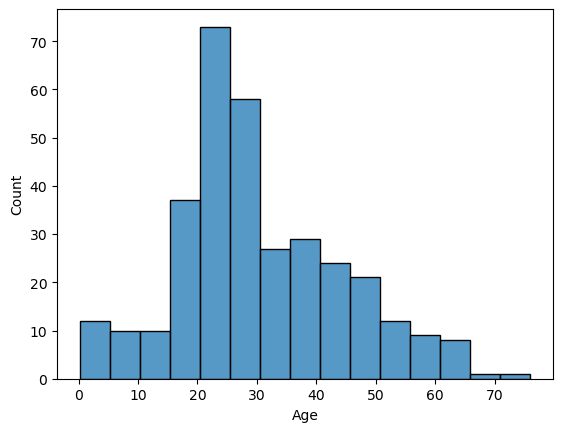

In [18]:
sns.histplot(data = test, x = "Age") # no coge los nulos

In [19]:
test.Age.mean()

30.272590361445783

In [20]:
test.Age.median() # vamos a usar la mediana para sustituir los datos nulos, además tiene sentido con el gráfico

27.0

In [21]:
test.Age.mode()

0    21.0
1    24.0
Name: Age, dtype: float64

In [22]:
test.Age = test.Age.fillna(test.Age.median())

In [23]:
test.Age.unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  , 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,  9.  ,
       48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  , 60.  ,
       36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  , 29.  ,
       28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  , 16.  ,
        1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,  7.  ,
       15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33, 38.  ,
       57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,  0.17,
       59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

<Axes: xlabel='Age', ylabel='Count'>

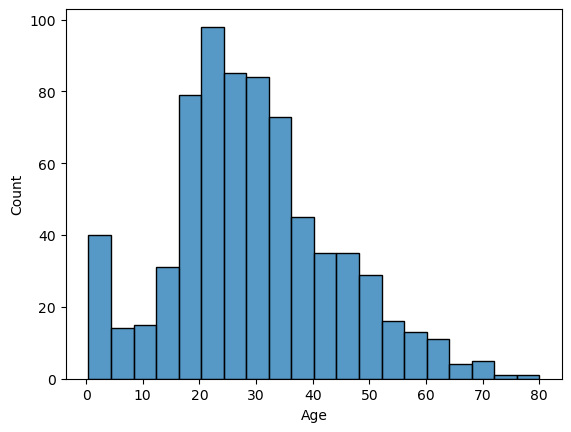

In [24]:
sns.histplot(data = train, x = "Age")

In [25]:
train.Age.mean()

29.69911764705882

In [26]:
train.Age.median()

28.0

In [27]:
train.Age.mode()

0    24.0
Name: Age, dtype: float64

In [28]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [29]:
train.Age = train.Age.fillna(train.Age.median())

In [30]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

FARE

<Axes: xlabel='Fare', ylabel='Count'>

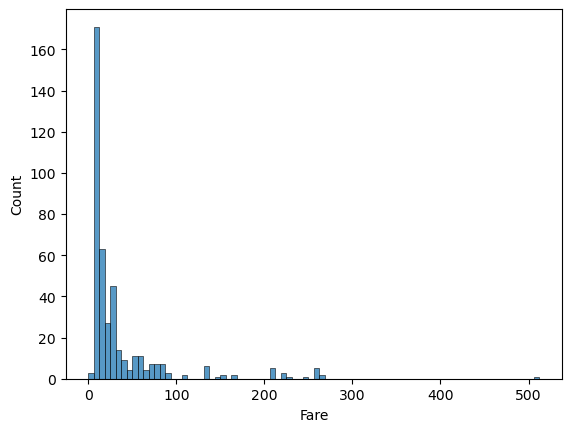

In [31]:
sns.histplot(data = test, x = "Fare")

In [32]:
test.Fare.median()

14.4542

In [33]:
test.Fare.mean()

35.627188489208635

In [34]:
test.Fare.mode()

0    7.75
Name: Fare, dtype: float64

Los valores null de Fare es mejor sustituirlos en función de la clase en la que viajan

Calculo la media de Fare en función de la clase en la q viajan

In [35]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [36]:
test.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [37]:
test.groupby("Pclass").Fare.mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [38]:
test.loc[test.Fare.isnull(), :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [39]:
test.Fare = test.Fare.fillna(12.459678)

In [40]:
test.loc[test.Fare.isnull(), :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived


EMBARKED

<Axes: xlabel='Embarked', ylabel='count'>

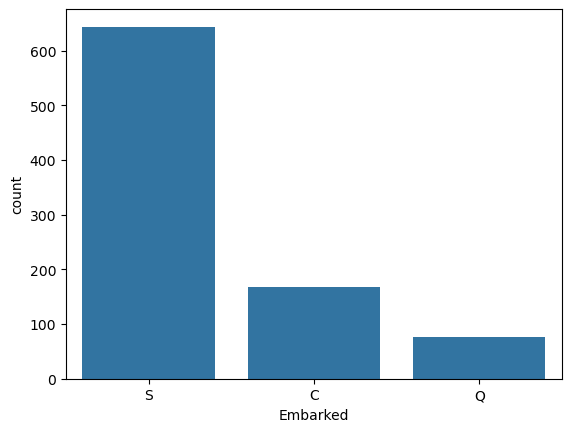

In [41]:
sns.countplot(data = train, x = "Embarked") #al ser discreto uso mejor cpuntplot en vez de histplot

<Axes: xlabel='Embarked', ylabel='count'>

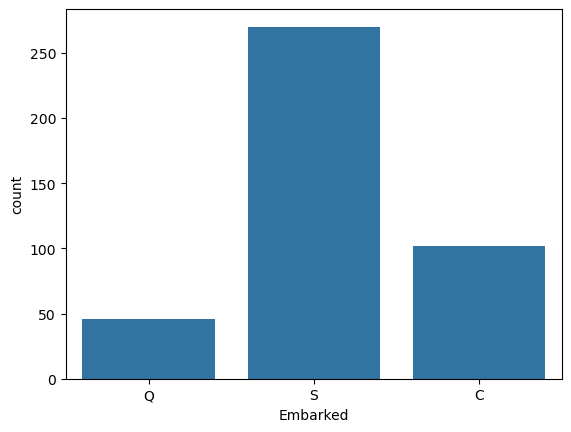

In [42]:
sns.countplot(data = test, x = "Embarked")

In [43]:
train.Embarked.mode() #sustituimos embarked por S

0    S
Name: Embarked, dtype: object

In [44]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
train.Embarked = train.Embarked.fillna("S")

In [46]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [47]:
test.Embarked.fillna(
    test.Embarked.mode()[0], #si lo hago sin poner "S" debo indicar que me sustituya los valores por el primer valor de moda (q es S)
    inplace = True
)

In [48]:
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

El Pclass, por mucho q sean números (1, 2, 3) lo convertiremos en dummies por el hecho de que la clase tercera no es el triple de la primera, ni la segunda clase es el doble de la primera. Así la Pclass es como strings, ya que los números no indican q sea el doble o triple

In [49]:
for i in test.columns:
    print(f"{i}: {type(test[i][0])}")

PassengerId: <class 'numpy.int64'>
Pclass: <class 'numpy.int64'>
Name: <class 'str'>
Sex: <class 'str'>
Age: <class 'numpy.float64'>
SibSp: <class 'numpy.int64'>
Parch: <class 'numpy.int64'>
Ticket: <class 'str'>
Fare: <class 'numpy.float64'>
Embarked: <class 'str'>
Survived: <class 'numpy.int64'>


In [50]:
for i in train.columns:
    print(f"{i}: {type(train[i][0])}")

PassengerId: <class 'numpy.int64'>
Survived: <class 'numpy.int64'>
Pclass: <class 'numpy.int64'>
Name: <class 'str'>
Sex: <class 'str'>
Age: <class 'numpy.float64'>
SibSp: <class 'numpy.int64'>
Parch: <class 'numpy.int64'>
Ticket: <class 'str'>
Fare: <class 'numpy.float64'>
Embarked: <class 'str'>


In [51]:
test = pd.get_dummies(
    test,
    columns = ["Pclass","Embarked", "Sex"], #poner las columans q queremos transformar a dummies, que son las de tipo string
    drop_first = True
)

In [52]:
test.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Survived', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S',
       'Sex_male'],
      dtype='object')

In [53]:
len(test.columns)

13

In [54]:
train = pd.get_dummies(
    train,
    columns = ["Pclass","Embarked", "Sex"], #poner las columans q queremos transformar a dummies, que son las de tipo string
    drop_first = True
)

In [55]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [56]:
len(train.columns)

13

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [57]:
test.drop(
    labels = ["PassengerId", "Name", 'Ticket',],
    axis = "columns",
    inplace = True
)

In [58]:
test.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,0,0,7.8292,0,False,True,True,False,True
1,47.0,1,0,7.0000,1,False,True,False,True,False
2,62.0,0,0,9.6875,0,True,False,True,False,True
3,27.0,0,0,8.6625,0,False,True,False,True,True
4,22.0,1,1,12.2875,1,False,True,False,True,False


In [59]:
train.drop(
    labels = ["PassengerId", "Name", 'Ticket',],
    axis = "columns",
    inplace = True
)

In [60]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,False,True,False,True,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,True,False
3,1,35.0,1,0,53.1000,False,False,False,True,False
4,0,35.0,0,0,8.0500,False,True,False,True,True


7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [61]:
print(type(test.Age))

<class 'pandas.core.series.Series'>


In [62]:
print(type(test.Age[0]))

<class 'numpy.float64'>


In [63]:
test["IsMinor"] = np.where(test["Age"] <= 16, 1, 0)

In [64]:
test.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,0,0,7.8292,0,False,True,True,False,True,0
1,47.0,1,0,7.0000,1,False,True,False,True,False,0
2,62.0,0,0,9.6875,0,True,False,True,False,True,0
3,27.0,0,0,8.6625,0,False,True,False,True,True,0
4,22.0,1,1,12.2875,1,False,True,False,True,False,0


In [65]:
train["IsMinor"] = np.where(train["Age"] <= 16, 1, 0)

In [66]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,1,0,7.2500,False,True,False,True,True,0
1,1,38.0,1,0,71.2833,False,False,False,False,False,0
2,1,26.0,0,0,7.9250,False,True,False,True,False,0
3,1,35.0,1,0,53.1000,False,False,False,True,False,0
4,0,35.0,0,0,8.0500,False,True,False,True,True,0


8. Ajustar modelo considerando todas las variables del dataset de training.

In [67]:
test.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,0,0,7.8292,0,False,True,True,False,True,0
1,47.0,1,0,7.0000,1,False,True,False,True,False,0
2,62.0,0,0,9.6875,0,True,False,True,False,True,0
3,27.0,0,0,8.6625,0,False,True,False,True,True,0
4,22.0,1,1,12.2875,1,False,True,False,True,False,0


In [68]:
X_train = train.loc[:,train.columns != "Survived"]
X_test = test.loc[:,test.columns != "Survived"]
y_train = train.loc[:,"Survived"] #es una serie
y_test = test.loc[:,"Survived"]

El fit crea la forma de la S

In [69]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter = 100000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [70]:
y_prediccion = modelo.predict(X_test)
y_prediccion # me sale una serie con umbral en 0.5

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
y_prediccion_proba = modelo.predict_proba(X_test)
y_prediccion_proba

array([[0.88373945, 0.11626055],
       [0.61534274, 0.38465726],
       [0.8159497 , 0.1840503 ],
       [0.90366732, 0.09633268],
       [0.5085494 , 0.4914506 ],
       [0.72363491, 0.27636509],
       [0.33388009, 0.66611991],
       [0.81986249, 0.18013751],
       [0.27297553, 0.72702447],
       [0.94311644, 0.05688356],
       [0.90393359, 0.09606641],
       [0.68305367, 0.31694633],
       [0.09837934, 0.90162066],
       [0.90169707, 0.09830293],
       [0.17044559, 0.82955441],
       [0.15441222, 0.84558778],
       [0.70292968, 0.29707032],
       [0.84631206, 0.15368794],
       [0.50223288, 0.49776712],
       [0.41039303, 0.58960697],
       [0.69490908, 0.30509092],
       [0.73680785, 0.26319215],
       [0.09061522, 0.90938478],
       [0.45282648, 0.54717352],
       [0.09165553, 0.90834447],
       [0.95792813, 0.04207187],
       [0.05809971, 0.94190029],
       [0.85071932, 0.14928068],
       [0.65375041, 0.34624959],
       [0.92783786, 0.07216214],
       [0.

In [72]:
y_prediccion_proba_1 = modelo.predict_proba(X_test)[:,1]
y_prediccion_proba_1

array([0.11626055, 0.38465726, 0.1840503 , 0.09633268, 0.4914506 ,
       0.27636509, 0.66611991, 0.18013751, 0.72702447, 0.05688356,
       0.09606641, 0.31694633, 0.90162066, 0.09830293, 0.82955441,
       0.84558778, 0.29707032, 0.15368794, 0.49776712, 0.58960697,
       0.30509092, 0.26319215, 0.90938478, 0.54717352, 0.90834447,
       0.04207187, 0.94190029, 0.14928068, 0.34624959, 0.07216214,
       0.12796814, 0.15617185, 0.39901951, 0.43514052, 0.43579106,
       0.16127159, 0.59287055, 0.62608358, 0.10068937, 0.11429666,
       0.09537475, 0.41792343, 0.07162848, 0.81569519, 0.83114403,
       0.10012112, 0.41850105, 0.13503036, 0.8939012 , 0.47189735,
       0.37440016, 0.34264671, 0.69644902, 0.85074454, 0.34313803,
       0.10903519, 0.08131623, 0.10002219, 0.06957592, 0.96842085,
       0.11783268, 0.23627379, 0.11541764, 0.70556706, 0.77313915,
       0.8303325 , 0.72432281, 0.32625078, 0.49661676, 0.81206678,
       0.69600179, 0.10865478, 0.58166826, 0.51008728, 0.96241

10. Calcular matriz de confusión

In [73]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [74]:
confusion_matrix(y_true = y_test, y_pred = y_prediccion)
# y_test son los valores verdaderos del testing de si han sobrevivido o no
# y_prediccion son los valores de si sobreviven o no q se predicen

array([[253,  13],
       [ 16, 136]], dtype=int64)

11. Calcular Accuracy

In [75]:
matriz_confusion = confusion_matrix(y_test, y_prediccion)
pd.DataFrame({
    "y_test": y_test,
    "y_prediccion": y_prediccion
}).groupby(["y_test", "y_prediccion"]).size()

TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

In [76]:
(TN + TP) / (TN + TP + FN + FP) * 100

93.0622009569378

12. Calcular sensibilidad

In [77]:
TP / (TP + FN) * 100

89.47368421052632

13. Calcular especificidad

In [78]:
TN / (TN + FP) * 100

95.11278195488721

14. Graficar curva de ROC

In [79]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_prediccion_proba_1)

<Axes: >

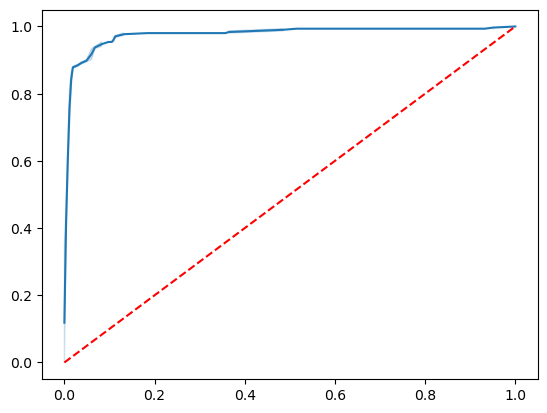

In [80]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x

sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, color = "red", ls = "--")

15. Calcular valor de área bajo la curva de ROC

In [81]:
roc_auc_score(y_test, y_prediccion_proba_1)

0.9764048278591215

El valor del área casi es 1, por lo que el modelo está bastante bien

<Axes: >

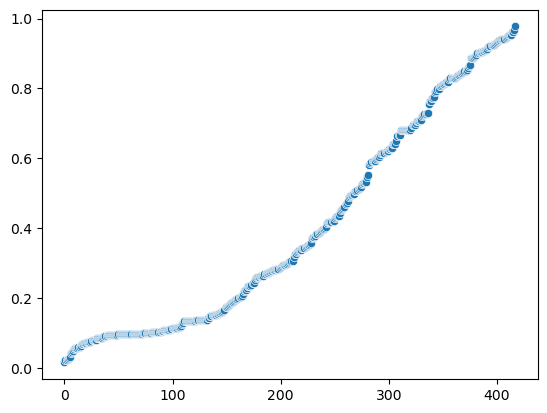

In [82]:
sns.scatterplot(x = range(len(y_prediccion_proba_1)), y = sorted(y_prediccion_proba_1))

Sobre esta gráfica habría q aplicar la fórmula para obtener la S